# Proyecto CC5206

Mineria de datos sobre datasets del banco mundial. Eliminar ultimas filas del excel

# Importar librerias y dataset

In [1]:
import numpy as np
import pandas as pd
import pdb

d_2016 = pd.read_excel('d_2016.xlsx', keep_default_na=False, na_values='')

d_2016.head()

,Country Name,Country Code,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agriculture value added per worker (constant 2010 US$),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)",...,"Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)",Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,AFG,1000.0,1000.0,86.570932,4.741808,81.829125,632.952294,21.910295,5.971751,...,7.722,8.540,23.617001,17.028999,18.326000,9402875.0,27.132,4.282960,2.769840e+08,28.627356
1,Albania,ALB,500.0,500.0,44.001540,18.481017,25.520523,4253.642793,22.955314,0.460000,...,16.469,16.333,35.692001,36.841999,36.422001,1678953.0,58.376,1.514007,3.870840e+08,29.800597
2,Algeria,DZA,1000.0,1000.0,53.907887,9.266538,44.641349,6221.586742,12.949289,2.100000,...,9.202,11.222,44.348999,22.641001,26.554001,28953739.0,71.304,2.637964,1.610756e+09,46.194624
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,48453.0,87.148,0.049545,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,65389.0,84.612,-1.537313,NaN,NaN


# Eliminar Outliers

In [27]:
#'''
outliers1 = [u'High income', u'High income: OECD', u'OECD members', u'World']
outliers2 = [u'East Asia & Pacific',u'East Asia & Pacific (excluding high income)',
 u'Euro area',u'Europe & Central Asia',u'European Union',u'Low & middle income',
 u'Middle income',u'North America',u'Upper middle income']

outliers3 = [u'Arab World', u'Sub-Saharan Africa',
             u'Sub-Saharan Africa (excluding high income)', u'Middle East & North Africa',
             u'Middle East & North Africa (excluding high income)', 
             u'Latin America & Caribbean',u'Latin America & Caribbean (excluding high income)',
             u'Least developed countries: UN classification', 
             u'Heavily indebted poor countries (HIPC)',u'High income',u'High income: nonOECD',
             u'High income: OECD', u'Euro area',u'Europe & Central Asia',
             u'Europe & Central Asia (excluding high income)',u'European Union',
             u'East Asia & Pacific',u'East Asia & Pacific (excluding high income)',
             u'Lower middle income',u'South Asia']

outliers4 = [u'IDA & IBRD total', u'IDA blend', u'IDA only', u'IDA total',
            u'East Asia & Pacific (IDA & IBRD countries)',u'Europe & Central Asia (IDA & IBRD countries)',
            u'Fragile and conflict affected situations',u'IBRD only',u'Late-demographic dividend',
            u'Latin America & the Caribbean (IDA & IBRD countries)',
            u'Middle East & North Africa (IDA & IBRD countries)',u'Not classified',
            u'Other small states',u'Post-demographic dividend',u'Pre-demographic dividend',]

for out in outliers1:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers2:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers3:
    d_2016 = d_2016[d_2016['Country Name'] != out]
for out in outliers4:
    d_2016 = d_2016[d_2016['Country Name'] != out]
#paises = xdata['Country Name'].values.tolist()
paises = d_2016['Country Name'].values.tolist()
#xdata.head()

# Normalización

In [28]:
d_2016_n = d_2016
for k in range(2,len(d_2016.keys())):
    
    llave = d_2016.keys()[k]
    valores = d_2016[llave] 
    xvals = valores.tolist()
    #Normalización
    xmax = np.nanmax(valores)[0]
    #pdb.set_trace()
    if (not np.isnan(xmax)) and xmax!=0:
            d_2016_n[llave] = d_2016[llave]/xmax
    

d_2016_n.head()

,Country Name,Country Code,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agriculture value added per worker (constant 2010 US$),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)",...,"Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)",Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,AFG,0.003704,0.003846,0.774485,0.107993,0.769218,0.002547,0.356709,0.100197,...,0.255138,0.271750,0.291402,0.248222,0.271059,0.006653,0.27132,0.739486,0.021184,0.426809
1,Albania,ALB,0.001852,0.001923,0.393649,0.420897,0.239901,0.017116,0.373722,0.007718,...,0.544142,0.519729,0.440392,0.537024,0.538715,0.001188,0.58376,0.261405,0.029604,0.444301
2,Algeria,DZA,0.003704,0.003846,0.482273,0.211042,0.419642,0.025034,0.210820,0.035235,...,0.304038,0.357093,0.547208,0.330025,0.392758,0.020486,0.71304,0.455465,0.123190,0.688722
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000034,0.87148,0.008554,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000046,0.84612,-0.265429,NaN,NaN


# Analisis Estadistico

In [29]:
varianzas = []
promedios = []
maximos = []
minimos = []
desv = []
for k in range(2,len(d_2016_n.keys())):
    
    llave = d_2016_n.keys()[k]
    valores = d_2016_n[llave] 
    count = 0
    
    #Normalización
    xmax = np.nanmax(valores)
    xmean = np.nanmean(valores)
    xmin = np.nanmin(valores)
    xstd = np.nanstd(valores)
    xvar = np.nanvar(valores)
    if np.isnan(xvar):
        print llave
    
    promedios.append(xmean)
    minimos.append(xmin)
    maximos.append(xmax)
    desv.append(xstd)
    varianzas.append(xvar)
    
sort = np.sort(varianzas)
most = -1   

print "Estadisticas con mayor varianza:"
#pdb.set_trace()
for i in range(10):
    j = np.argwhere(varianzas == sort[most])
    k = sort[most]
    features = d_2016_n.keys()
    print str(i+1)+' '+str(features[j])+' ('+str(sort[most]) #+')\n'
    most-=1


Estadisticas con mayor varianza:
1 Index([[u'Debt buyback (current US$)']], dtype='object') (6.51129848625e+16
2 Index([[u'Net flows on external debt, total (NFL, current US$)']], dtype='object') (4.48173182516
3 Index([[u'Disbursements on external debt, private nonguaranteed (PNG) (DIS, current US$)']], dtype='object') (3.88421350483
4 Index([[u'Rural population']], dtype='object') (0.197545049611
5 Index([[u'GNI per capita (constant 2010 US$)']], dtype='object') (0.19638459186
6 Index([[u'Household final consumption expenditure (current US$)']], dtype='object') (0.167237339423
7 Index([[u'GDP per capita (current LCU)']], dtype='object') (0.158681191382
8 Index([[u'GNI (current LCU)']], dtype='object') (0.156706499552
9 Index([[u'DEC alternative conversion factor (LCU per US$)']], dtype='object') (0.153358500463
10 Index([[u'Exports of goods and services (current LCU)']], dtype='object') (0.14730064848


# Graficos

## Histogramas

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x = []
for nonan in xdata['Population ages 0-14, total']:
#for nonan in xdata['Self-employed, male (% of males employed)']:
    if not np.isnan(nonan):
        x.append(nonan)

ax1.hist(x, 5, facecolor='green', alpha=0.75)

ax1.set_xlabel('Population ages 0-14')
ax1.set_ylabel('Total')
#ax1.title('Histograma')

#plt.add_subplot(212, facecolor='r')
x =[]
for nonan in xdata['Self-employed, male (% of males employed)']:
    if not np.isnan(nonan):
        x.append(nonan)

ax2.hist(x, 5, facecolor='blue', alpha=0.75)

ax2.set_xlabel('Self-employed, male')
ax2.set_ylabel('% of males employed')

plt.show()

NameError: name 'xdata' is not defined

## Codo

In [33]:
np_df = d_2016_n.as_matrix()
test = np_df[:,2:]
for row in range(test.shape[0]):
    for column in range(test.shape[1]):
        val = test[row][column]
        #print val
        if np.isnan(val):
            test[row][column]= promedios[column] 
        else:
            #test[row][column]= val/maximos[column] 
            pass

xdf = pd.DataFrame(test)

vectors = []
tot = test#.T
for i in range(len(tot[:,0])):
    vectors.append(tot[i])
    
#xdf.head()

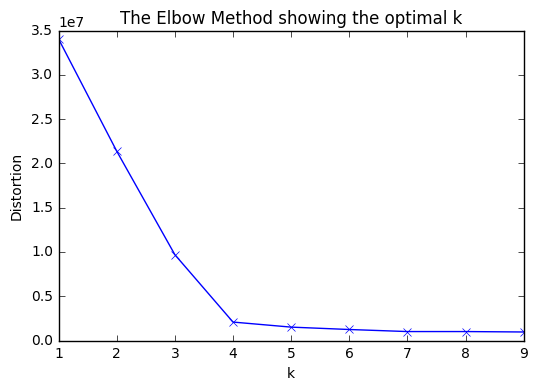

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from scipy.spatial.distance import cdist

X = tot

#kmeans = KMeans(n_clusters=4)
#kmeans.fit(X)
#labels = kmeans.labels_

#centroids = kmeans.cluster_centers_

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='random').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# TSNE

## Development

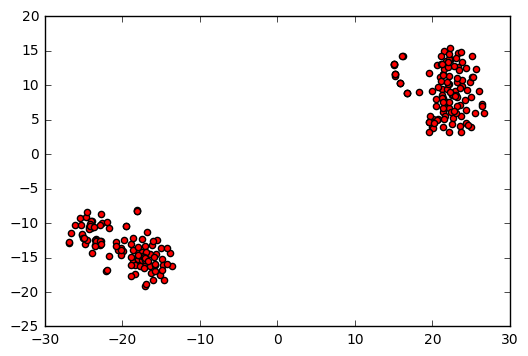

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = vectors
X_embedded = TSNE(n_components=2,n_iter=100000000).fit_transform(X)
X_embedded.shape
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c="r", cmap=plt.cm.Spectral)
plt.show()

# PCA

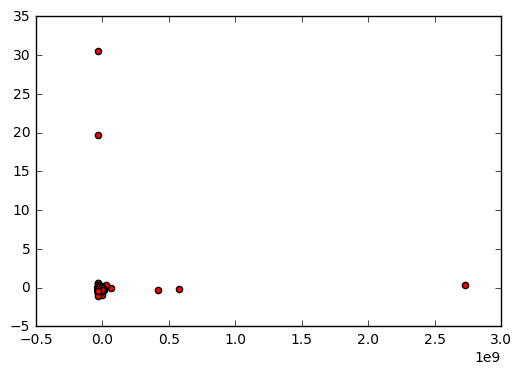

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = tot
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


plt.scatter(X[:, 0], X[:, 1], c="r", cmap=plt.cm.spectral,
           edgecolor='k')


plt.show()

# clustering

In [37]:
from sklearn.cluster import KMeans
from sklearn import datasets

X = tot

kmeans = KMeans(n_clusters=4,init="random")
kmeans.fit(X)
labels = kmeans.labels_

centroids = kmeans.cluster_centers_



# tSNE

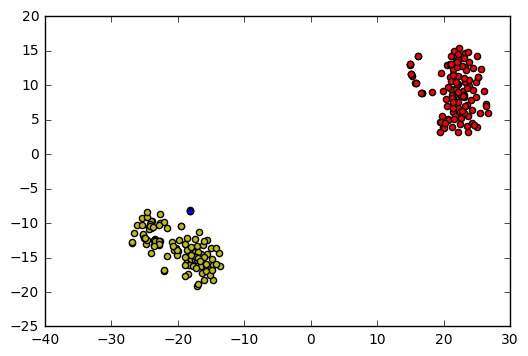

In [38]:
r = []
r_l = []
g = []
g_l = []
b = [] 
b_l = []
y = []
y_l = []
c=[]
c_l=[]
m=[]
m_l=[]

r_embedded = TSNE(n_components=2,n_iter=100000000).fit_transform(X)
r_embedded.shape
for k in range(len(labels)):
    if labels[k]==0:
        r.append(X_embedded[k])
        r_l.append(paises[k])
    elif labels[k]==1:
        g.append(X_embedded[k])
        g_l.append(paises[k])
    elif labels[k]==2:
        b.append(X_embedded[k])
        b_l.append(paises[k])
    elif labels[k]==3:
        y.append(X_embedded[k])
        y_l.append(paises[k])
    elif labels[k]==4:
        c.append(X_embedded[k])
        c_l.append(paises[k])
    elif labels[k]==5:
        m.append(X_embedded[k])
        m_l.append(paises[k])
plt.scatter([item[0] for item in r], [item[1] for item in r], c="r", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in g], [item[1] for item in g], c="g", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in b], [item[1] for item in b], c="b", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in y], [item[1] for item in y], c="y", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in c], [item[1] for item in c], c="c", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in m], [item[1] for item in m], c="m", cmap=plt.cm.Spectral)
plt.show()

# PCA 

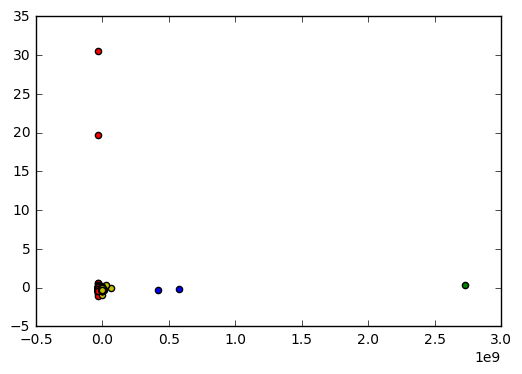

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


X = tot
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

r = []
r_l = []
g = []
g_l = []
b = [] 
b_l = []
y = []
y_l = []

for k in range(len(labels)):
    if labels[k]==0:
        r.append(X[k])
        r_l.append(paises[k])
    elif labels[k]==1:
        g.append(X[k])
        g_l.append(paises[k])
    elif labels[k]==2:
        b.append(X[k])
        b_l.append(paises[k])
    elif labels[k]==3:
        y.append(X[k])
        y_l.append(paises[k])
        
plt.scatter([item[0] for item in r], [item[1] for item in r], c="r", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in g], [item[1] for item in g], c="g", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in b], [item[1] for item in b], c="b", cmap=plt.cm.Spectral)
plt.scatter([item[0] for item in y], [item[1] for item in y], c="y", cmap=plt.cm.Spectral)
plt.show()

In [24]:
r_l

[u'Mexico']

In [40]:
g_l

[u'Mexico']

In [26]:
b_l

[u'American Samoa',
 u'Andorra',
 u'Antigua and Barbuda',
 u'Aruba',
 u'Australia',
 u'Austria',
 u'Bahamas, The',
 u'Bahrain',
 u'Barbados',
 u'Belgium',
 u'Bermuda',
 u'British Virgin Islands',
 u'Brunei Darussalam',
 u'Cambodia',
 u'Canada',
 u'Caribbean small states',
 u'Cayman Islands',
 u'Central Europe and the Baltics',
 u'Channel Islands',
 u'Chile',
 u'Croatia',
 u'Cuba',
 u'Curacao',
 u'Cyprus',
 u'Czech Republic',
 u'Denmark',
 u'Early-demographic dividend',
 u'Equatorial Guinea',
 u'Estonia',
 u'Faroe Islands',
 u'Finland',
 u'France',
 u'French Polynesia',
 u'Germany',
 u'Gibraltar',
 u'Greece',
 u'Greenland',
 u'Guam',
 u'Hong Kong SAR, China',
 u'Hungary',
 u'Iceland',
 u'Iraq',
 u'Ireland',
 u'Isle of Man',
 u'Israel',
 u'Italy',
 u'Japan',
 u'Kiribati',
 u'Korea, Dem. People\u2019s Rep.',
 u'Korea, Rep.',
 u'Kuwait',
 u'Kyrgyz Republic',
 u'Latvia',
 u'Libya',
 u'Liechtenstein',
 u'Lithuania',
 u'Low income',
 u'Luxembourg',
 u'Macao SAR, China',
 u'Madagascar',
 u'Mal

In [ ]:
y_l

In [ ]:
c_l

In [ ]:
m_l

In [ ]:
d_2016.head()

In [ ]:
llave = d_2016.keys()[8]
valores = d_2016[llave] 
t_max = np.nanmax(valores)[0]
valores=valores/t_max

In [ ]:
d_2016_n[u'Debt buyback (current US$)'][d_]